# Data Balancing

In [ ]:
import pandas as pd
from PIL import Image
from IPython.display import display
import os
import numpy as np

## Load Data

In [ ]:
df = pd.read_csv('../raw_data/RFMiD_Training_Labels.csv')
df.head()

ID  Disease_Risk  DR  ARMD  MH  DN  MYA  BRVO  TSLN  ERM  ...  CME  PTCR  \
0   1             1   1     0   0   0    0     0     0    0  ...    0     0   
1   2             1   1     0   0   0    0     0     0    0  ...    0     0   
2   3             1   1     0   0   0    0     0     0    0  ...    0     0   
3   4             1   0     0   1   0    0     0     0    0  ...    0     0   
4   5             1   1     0   0   0    0     0     0    0  ...    0     0   

   CF  VH  MCA  VS  BRAO  PLQ  HPED  CL  
0   0   0    0   0     0    0     0   0  
1   0   0    0   0     0    0     0   0  
2   0   0    0   0     0    0     0   0  
3   0   0    0   0     0    0     0   0  
4   0   0    0   0     0    0     0   0  

[5 rows x 47 columns]

In [ ]:
df_binary = df.loc[:, df.columns.intersection(['ID','Disease_Risk'])]
df_binary.head()

ID  Disease_Risk
0   1             1
1   2             1
2   3             1
3   4             1
4   5             1

In [ ]:
df_binary.shape

(1920, 2)

In [ ]:
df_binary['Disease_Risk'].value_counts()

Disease_Risk
1    1519
0     401
Name: count, dtype: int64

## Load images

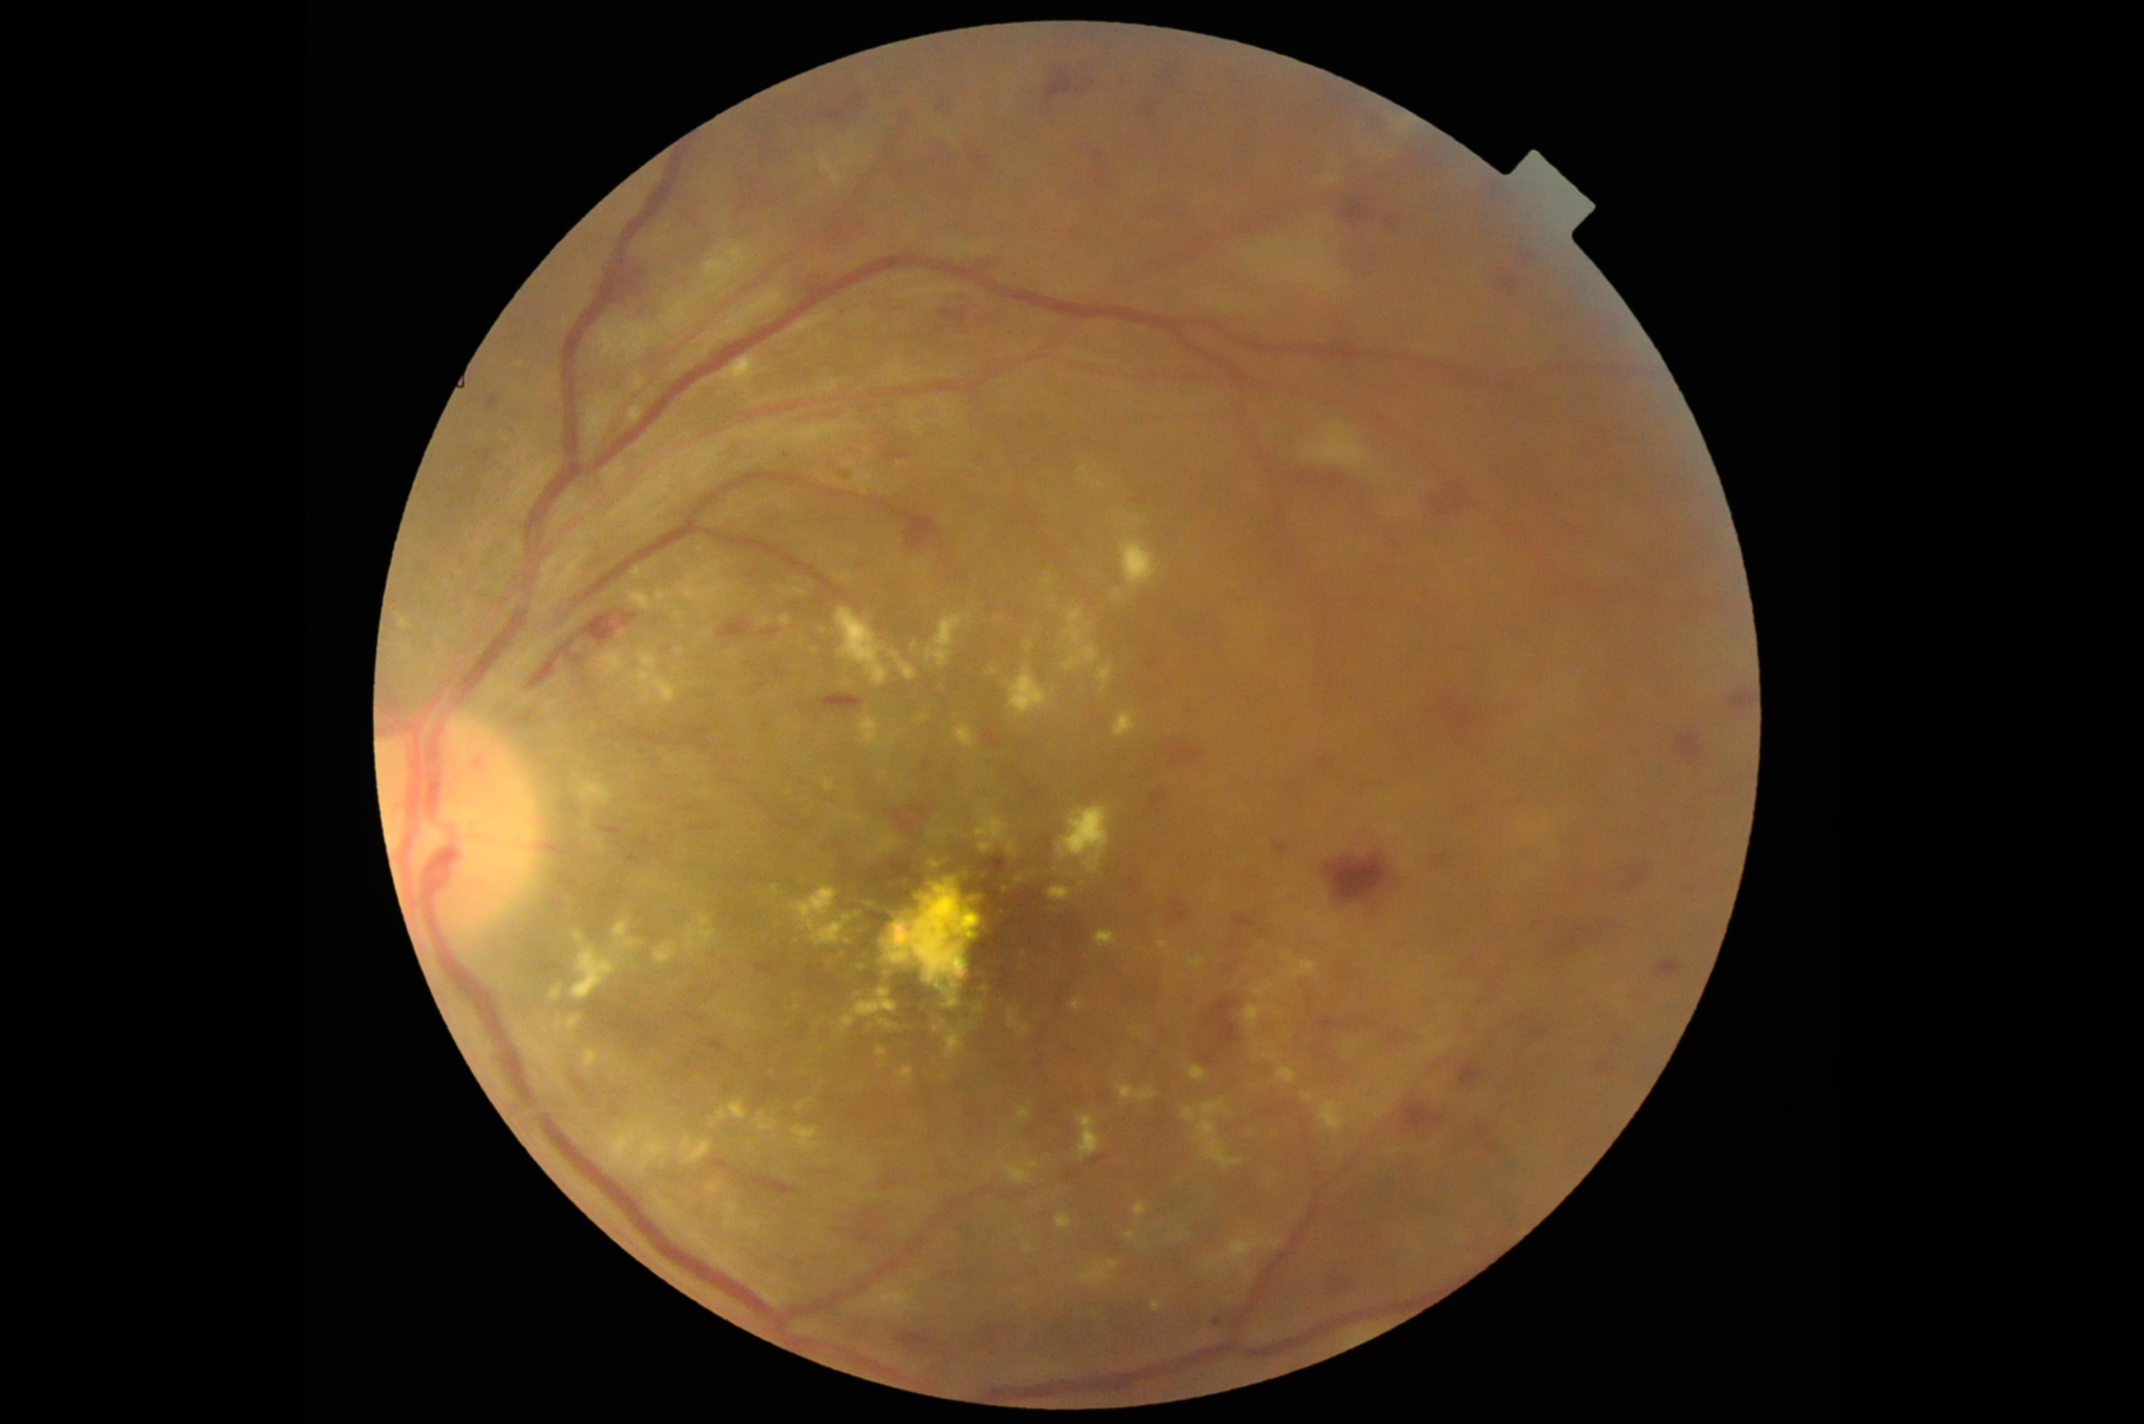

In [ ]:
img = Image.open("../raw_data/Training/1.png")
display(img)

## Take all 401 healthy ones and random 401 from unhealthy ones

In [ ]:
df_unhealthy = df_binary[df.Disease_Risk == 1]
df_unhealthy

ID  Disease_Risk
0        1             1
1        2             1
2        3             1
3        4             1
4        5             1
...    ...           ...
1909  1910             1
1913  1914             1
1914  1915             1
1915  1916             1
1916  1917             1

[1519 rows x 2 columns]

In [ ]:
df_healthy = df_binary[df.Disease_Risk == 0]
df_healthy

ID  Disease_Risk
9       10             0
15      16             0
16      17             0
20      21             0
27      28             0
...    ...           ...
1911  1912             0
1912  1913             0
1917  1918             0
1918  1919             0
1919  1920             0

[401 rows x 2 columns]

In [ ]:
df_unhealthy_rndselection = df_unhealthy.sample(n = 401)
df_unhealthy_rndselection

ID  Disease_Risk
1364  1365             1
934    935             1
1520  1521             1
1579  1580             1
345    346             1
...    ...           ...
1211  1212             1
877    878             1
1091  1092             1
697    698             1
187    188             1

[401 rows x 2 columns]

In [ ]:
# ^ MAKE THIS A RANDOM SELECTION ^

## Use ID to pull from image

In [ ]:
# img = Image.open("/home/saeed/code/Saeed-beepboop/project preparation/Training/1.png")
img_dict_healthy = {}
for id_no in df_healthy.ID:
    img = Image.open(f"../raw_data/Training/{id_no}.png")
    img_dict_healthy[id_no] = img
img_dict_healthy
# display(img)

{10: <PIL.PngImagePlugin.PngImageFile image mode=RGB size=2144x1424>,
 16: <PIL.PngImagePlugin.PngImageFile image mode=RGB size=2144x1424>,
 17: <PIL.PngImagePlugin.PngImageFile image mode=RGB size=2144x1424>,
 21: <PIL.PngImagePlugin.PngImageFile image mode=RGB size=2144x1424>,
 28: <PIL.PngImagePlugin.PngImageFile image mode=RGB size=2144x1424>,
 68: <PIL.PngImagePlugin.PngImageFile image mode=RGB size=2144x1424>,
 81: <PIL.PngImagePlugin.PngImageFile image mode=RGB size=2144x1424>,
 83: <PIL.PngImagePlugin.PngImageFile image mode=RGB size=2144x1424>,
 90: <PIL.PngImagePlugin.PngImageFile image mode=RGB size=2144x1424>,
 91: <PIL.PngImagePlugin.PngImageFile image mode=RGB size=2144x1424>,
 92: <PIL.PngImagePlugin.PngImageFile image mode=RGB size=2144x1424>,
 93: <PIL.PngImagePlugin.PngImageFile image mode=RGB size=2144x1424>,
 94: <PIL.PngImagePlugin.PngImageFile image mode=RGB size=2144x1424>,
 115: <PIL.PngImagePlugin.PngImageFile image mode=RGB size=2144x1424>,
 116: <PIL.PngImage

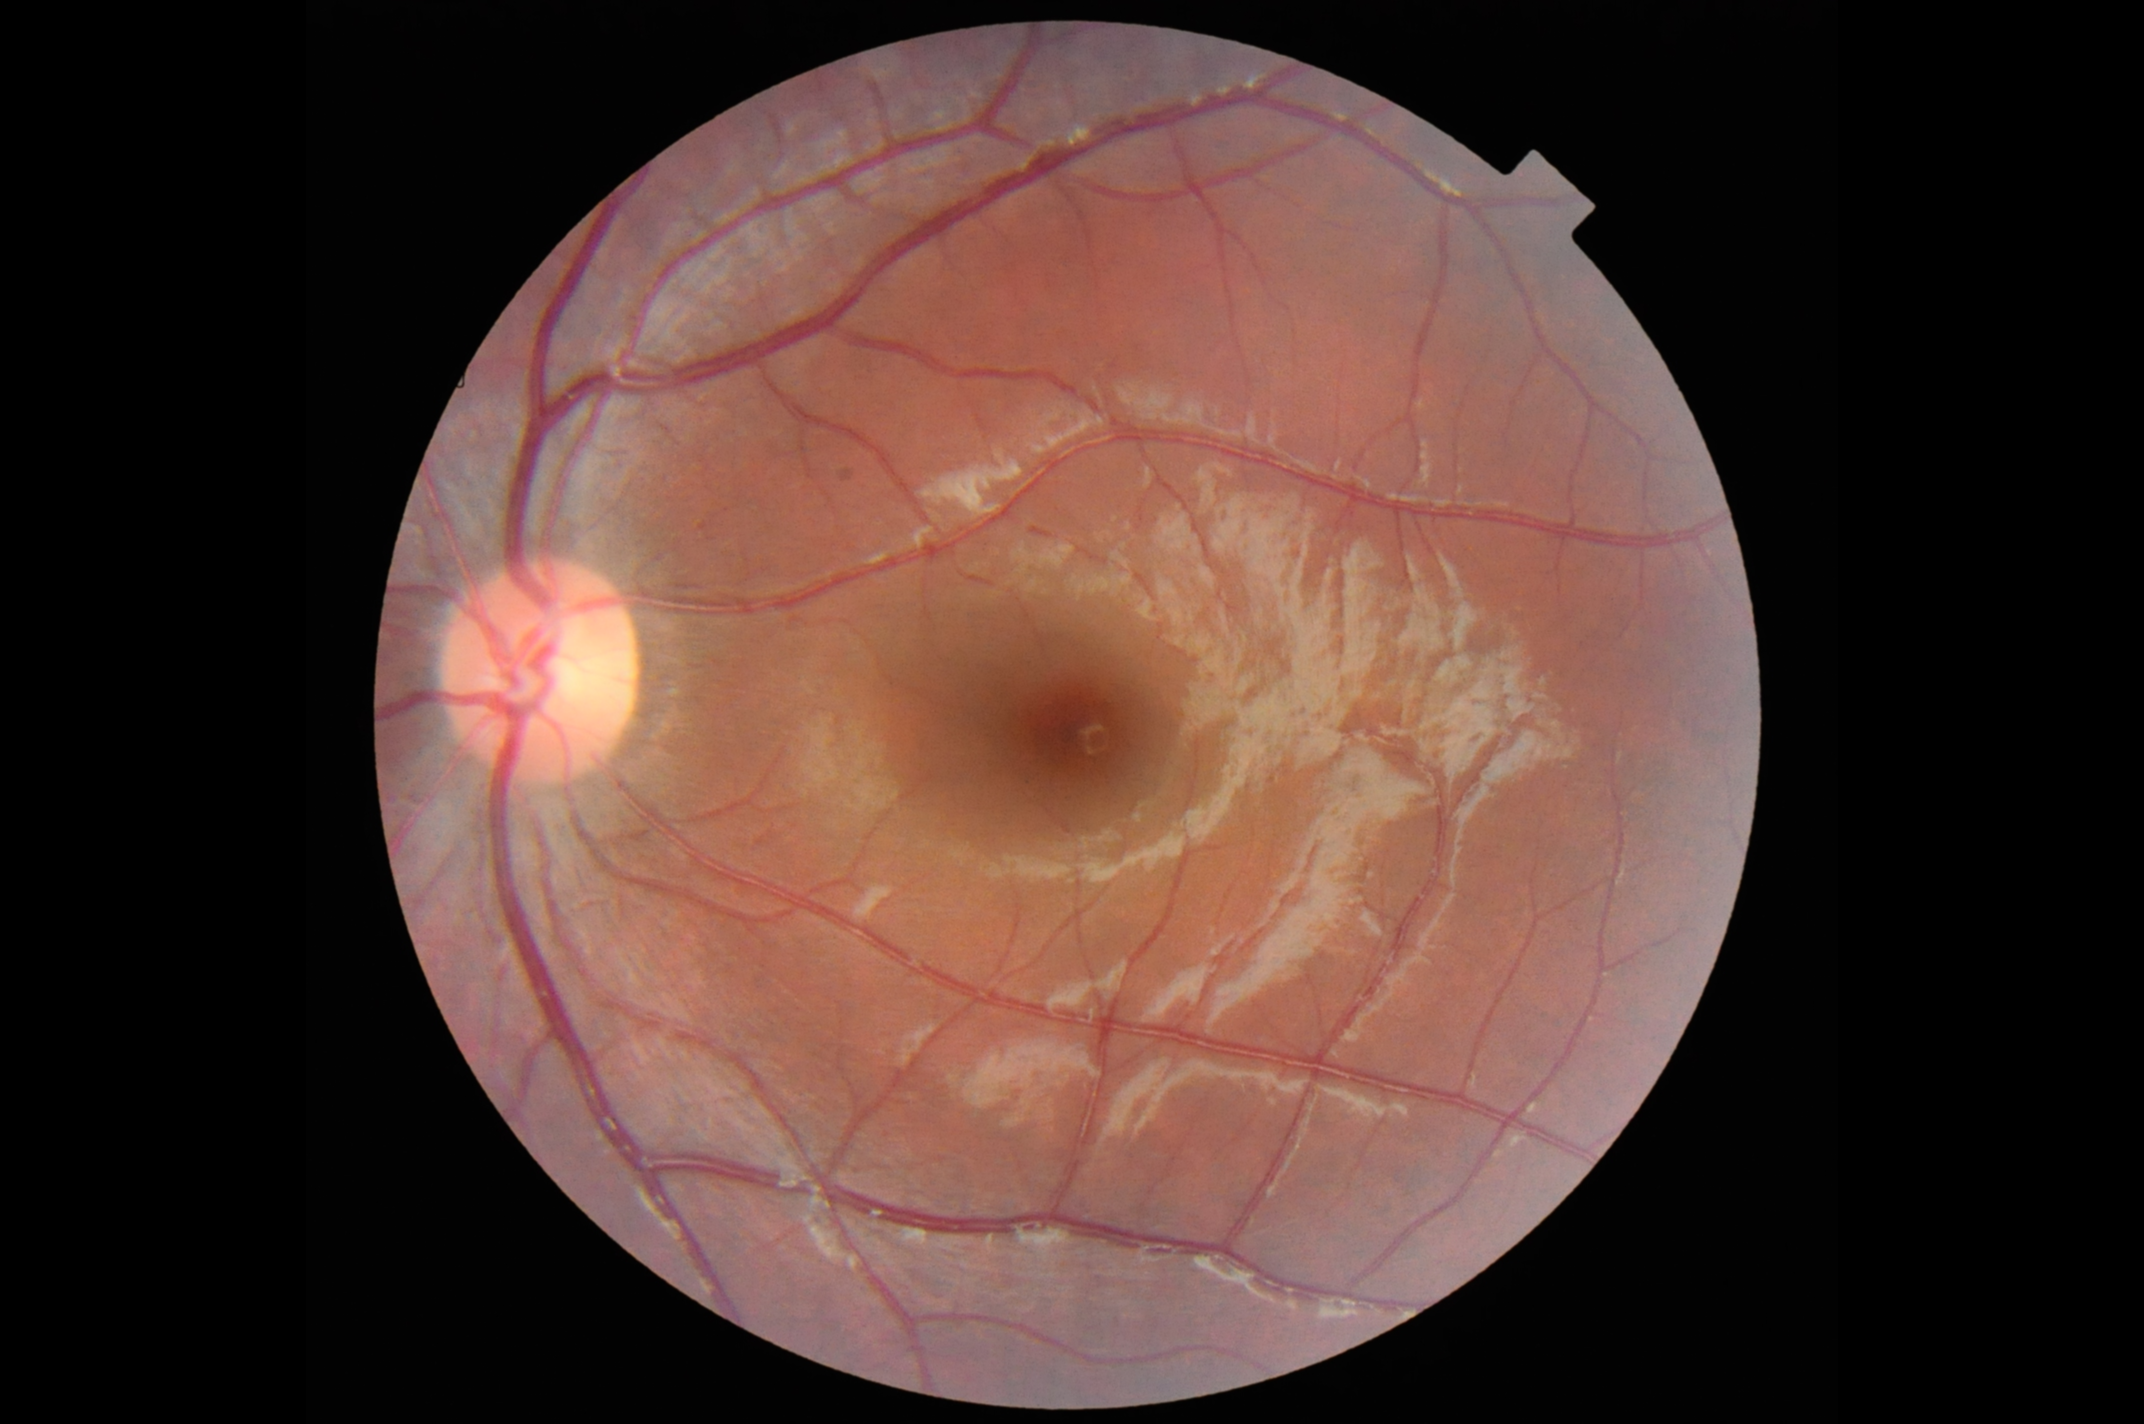

In [ ]:
display(img_dict_healthy[10])

In [ ]:
# img = Image.open("/home/saeed/code/Saeed-beepboop/project preparation/Training/1.png")
img_dict_unhealthy = {}
for id_no in df_unhealthy_rndselection.ID:
    img = Image.open(f"../raw_data/Training/{id_no}.png")
    img_dict_unhealthy[id_no] = img
img_dict_unhealthy
# display(img)

{1365: <PIL.PngImagePlugin.PngImageFile image mode=RGB size=2144x1424>,
 935: <PIL.PngImagePlugin.PngImageFile image mode=RGB size=2144x1424>,
 1521: <PIL.PngImagePlugin.PngImageFile image mode=RGB size=4288x2848>,
 1580: <PIL.PngImagePlugin.PngImageFile image mode=RGB size=4288x2848>,
 346: <PIL.PngImagePlugin.PngImageFile image mode=RGB size=2144x1424>,
 1222: <PIL.PngImagePlugin.PngImageFile image mode=RGB size=2144x1424>,
 1157: <PIL.PngImagePlugin.PngImageFile image mode=RGB size=2144x1424>,
 1431: <PIL.PngImagePlugin.PngImageFile image mode=RGB size=2144x1424>,
 580: <PIL.PngImagePlugin.PngImageFile image mode=RGB size=2144x1424>,
 1268: <PIL.PngImagePlugin.PngImageFile image mode=RGB size=2144x1424>,
 136: <PIL.PngImagePlugin.PngImageFile image mode=RGB size=2144x1424>,
 950: <PIL.PngImagePlugin.PngImageFile image mode=RGB size=2144x1424>,
 1661: <PIL.PngImagePlugin.PngImageFile image mode=RGB size=4288x2848>,
 1750: <PIL.PngImagePlugin.PngImageFile image mode=RGB size=2048x1536

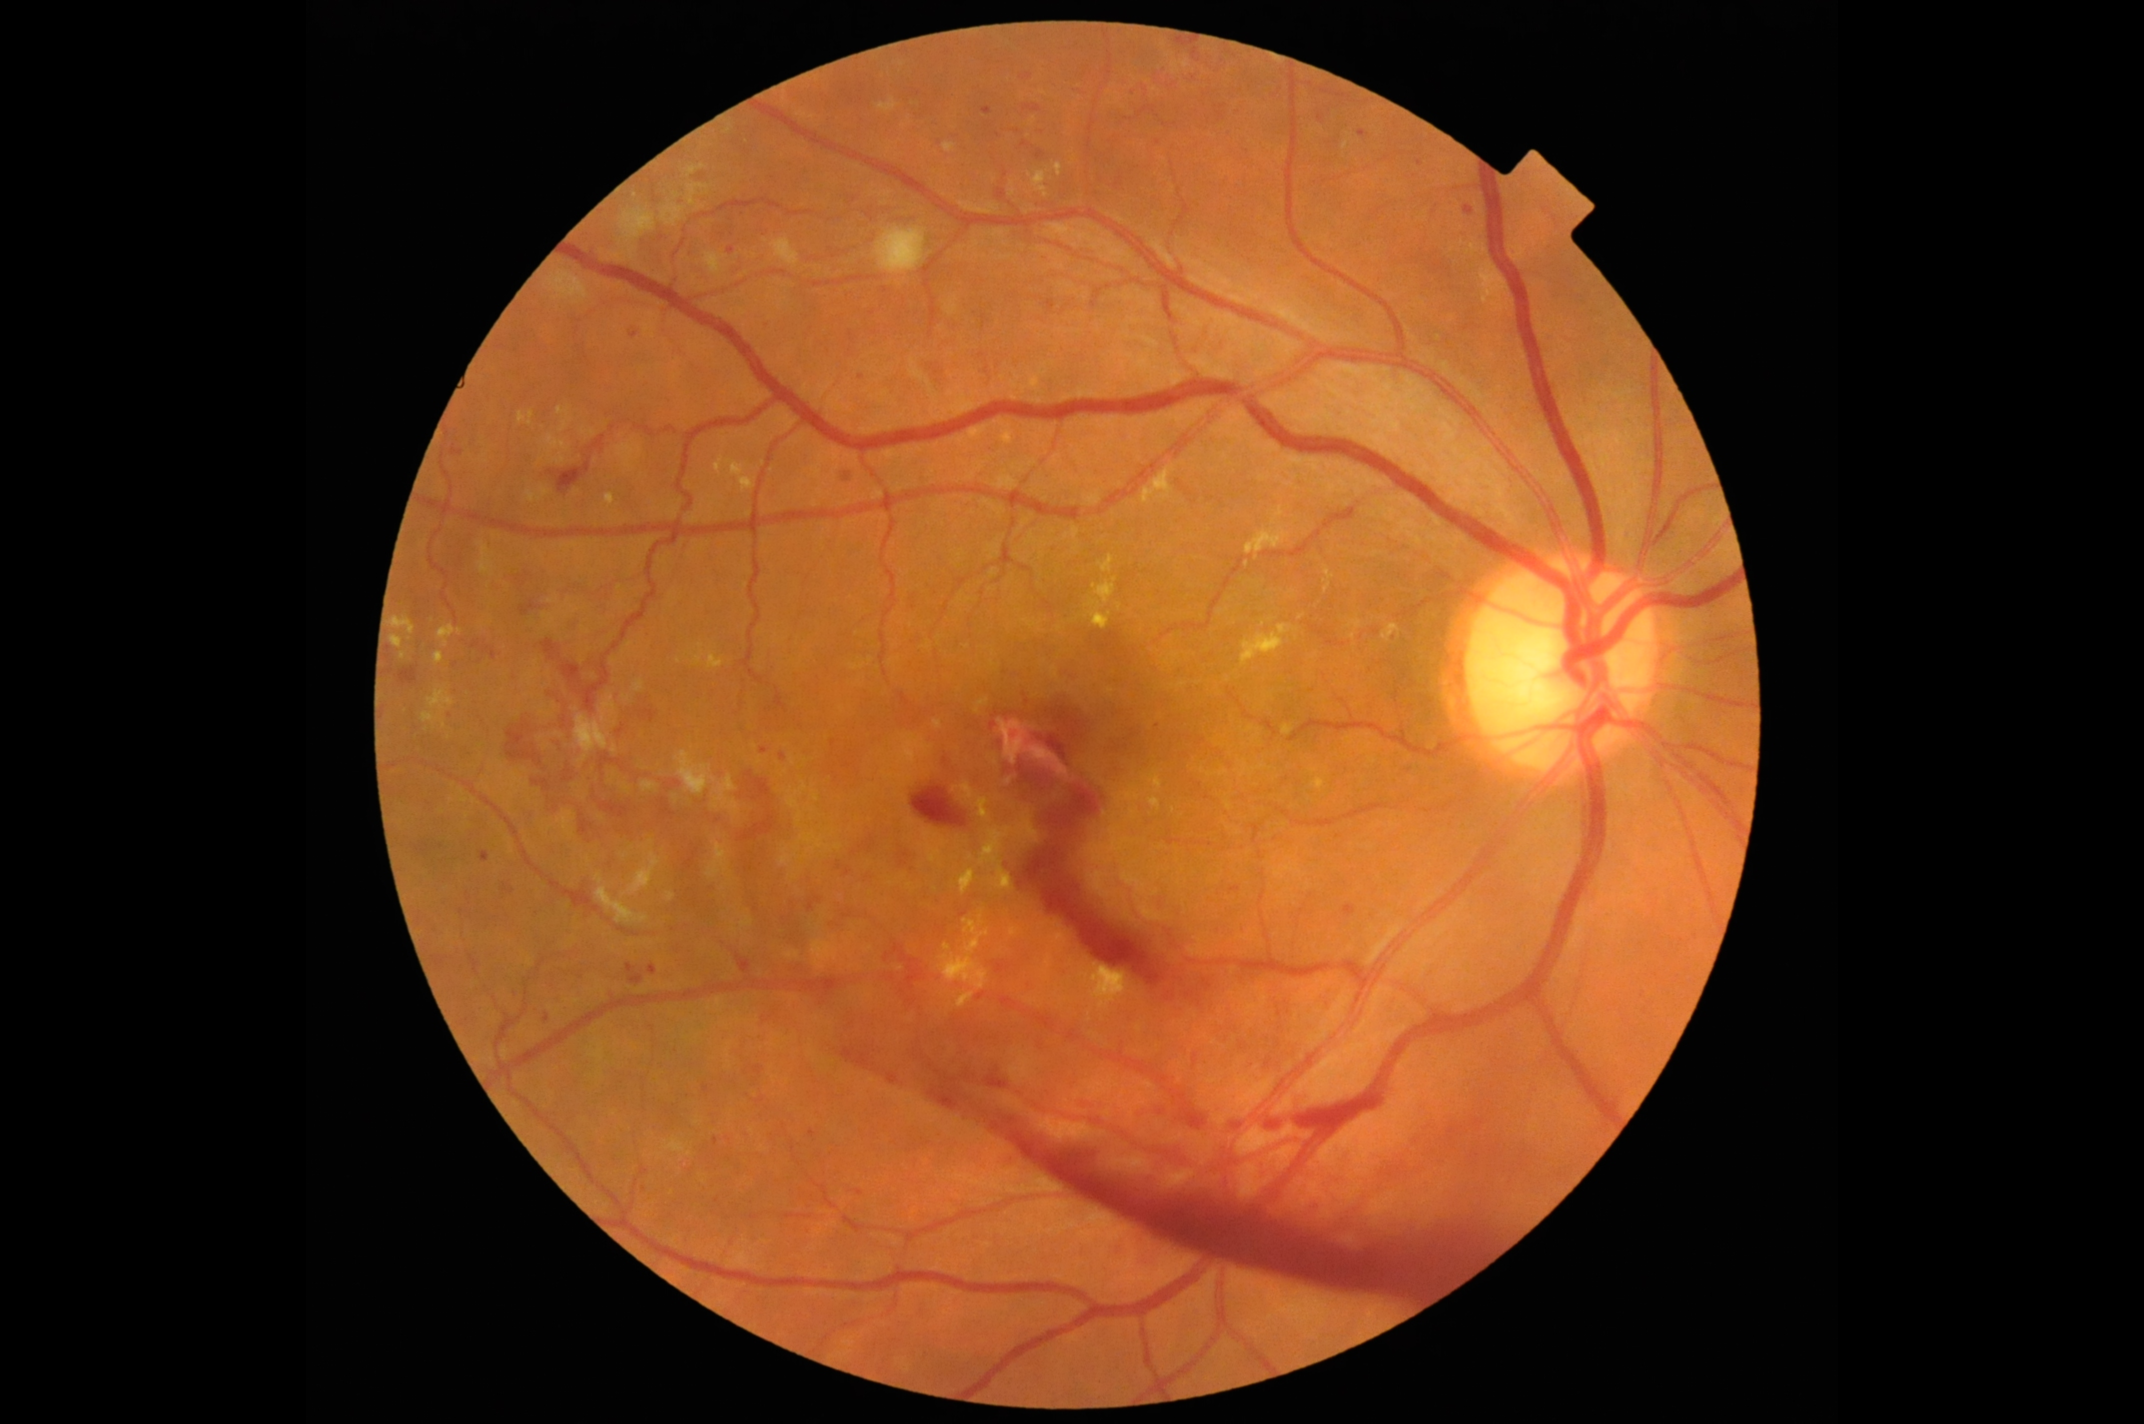

In [ ]:
display(img_dict_unhealthy[402])

## Unify image sizes

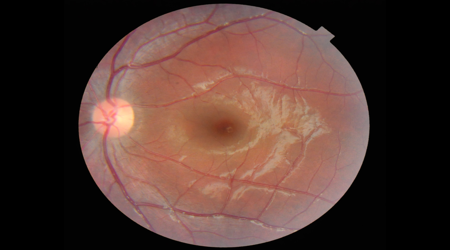

In [ ]:
new_size = (450, 250)
for id in img_dict_healthy:
    smaller_img = img_dict_healthy[id].resize(new_size)
    img_dict_healthy.update({id:smaller_img})

display(img_dict_healthy[10])

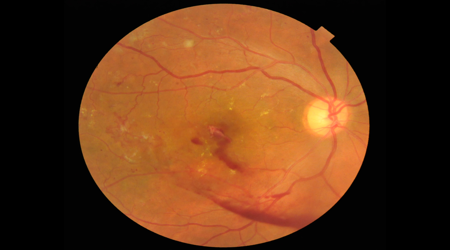

In [ ]:
new_size = (450, 250)
for id in img_dict_unhealthy:
    smaller_img = img_dict_unhealthy[id].resize(new_size)
    img_dict_unhealthy.update({id:smaller_img})

display(img_dict_unhealthy[402])